# **Итоговый проект первого года обучения**

# Агенство недвижимости

#**I. Определение задачи и планирование**

## 1. Постановка задачи

Поводом к работе явилось обращение представителя крупного агентства недвижимости со следующей проблемой:

"Мои риелторы тратят катастрофически много времени на сортировку
объявлений и поиск выгодных предложений. Поэтому их скорость реакции, да
и, сказать по правде, качество анализа не дотягивают до уровня конкурентов.
Это сказывается на наших финансовых показателях.
Ваша задача — разработать модель, которая позволила бы обойти
конкурентов по скорости и качеству совершения сделок"

### 1.1. Цель проекта


*   Разработать сервис для предсказания стоимости домов на основе истории предложений.
*   Для анализа доступны следующие данные:

`status`: Статус объекта недвижимости. Может принимать значения, например: "for sale" (продается), "sold" (продано), "pending" (в ожидании), "foreclosure" (выкуп), и т.д.

`private pool` & `PrivatePool`: Наличие частного бассейна. Вероятно, дублирующая колонка, одна из которых содержит больше пропущенных значений. Значения могут быть "yes", "no", True, False, 1, 0, или просто наличие какой-либо информации в одной из колонок, а в другой — NaN.

`propertyType`: Тип недвижимости. Например: "house" (дом), "condo" (кондоминиум), "apartment" (квартира), "townhouse" (таунхаус), "land" (земля), "multi-family" (многоквартирный дом) и т.д.

`street`: Адрес улицы объекта недвижимости.

`baths`: Количество ванных комнат. Может быть целым числом или дробным (например, 2.5 для двух полных и одной половинной ванной).

`homeFacts`: Различные характеристики дома, вероятно, в формате строки или списка. Может содержать информацию о годе постройки, материалах, особенностях и т.д. Требует дальнейшего исследования для точной интерпретации.

`fireplace`: Наличие камина. "yes", "no", True, False, 1, 0, или просто наличие/отсутствие текста в ячейке.

`city`: Город, в котором находится объект недвижимости.

`schools`: Информация о школах, относящихся к данному адресу. Формат данных может варьироваться (строка, список, JSON). Может содержать названия школ, рейтинги, расстояние до объекта и т.д.

`sqft`: Площадь объекта в квадратных футах.

`zipcode`: Почтовый индекс.

`beds`: Количество спален.

`state`: Штат, в котором находится объект недвижимости (предположительно, данные по США).

`stories`: Количество этажей в здании.

`mls-id` & `MlsId`: Идентификатор объекта в системе MLS (Multiple Listing Service). MLS — это база данных, используемая агентами по недвижимости. Так же, как и с бассейнами, скорее всего дублирующая колонка.

`target`: Целевая переменная. Её значение зависит от задачи, для которой собран датасет. Если это предсказание цены, то `target` будет ценой. Если это классификация (например, продастся ли объект быстро), то `target` будет категориальной переменной.



*   Для оценки качества модели будем использовать следующие метрики - RMSE, MAE, R-квадрат

###1.2. Тип задачи

В данном случае предстоит решить задачу регрессии (предсказание цены).

###1.3. Определение целевой переменной

Целевой переменной в нашем проекте будет являться признак `target`

###1.4. Определение baseline

Baseline (базовая линия, базовый уровень) в машинном обучении — это простое решение задачи, которое служит отправной точкой для сравнения более сложных моделей. Цель baseline - показать, насколько полученные модели превосходят наивное решение. Baseline модель может быть очень простой, но должна быть адекватной для данной задачи.

В нашем случае с датасетом о недвижимости, baseline будет:

* Регрессия (предсказание цены): средняя цена всех объектов.

###1.6 Определение бизнес-цели и KPI, на которые повлияет внедрение модели

* Бизнес-цель: Увеличить количество успешных сделок и/или повысить доход агентства.
* KPI:
    * Конверсия (отношение количества сделок к количеству показов/обращений)
    * Средняя комиссия с сделки
    * Скорость продажи объектов
    * Удовлетворенность клиентов (опросы, отзывы)
    * Точность оценки рыночной стоимости (снижение количества переоценок)





##2. Сбор и анализ данных

###2.1. Источник данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/data_final_project.csv')

In [ ]:
data.head()

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,3.0,NaN,NaN,14191809,"$2,395,000"
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,NaN,FL,NaN,NaN,NaN,861745,"$5,000"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103114 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226469 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

###2.2. Анализ пропущенных значений

Пропущенные значения:
                Total    Percent
private pool  373004  98.891525
mls-id        352243  93.387330
PrivatePool   336874  89.312672
fireplace     274071  72.662221
stories       150716  39.958111
baths         106338  28.192532
beds           91282  24.200856
MlsId          66880  17.731352
sqft           40577  10.757851
status         39918  10.583136
propertyType   34733   9.208479
target          2481   0.657767
city              34   0.009014
street             2   0.000530
zipcode            0   0.000000
schools            0   0.000000
state              0   0.000000
homeFacts          0   0.000000


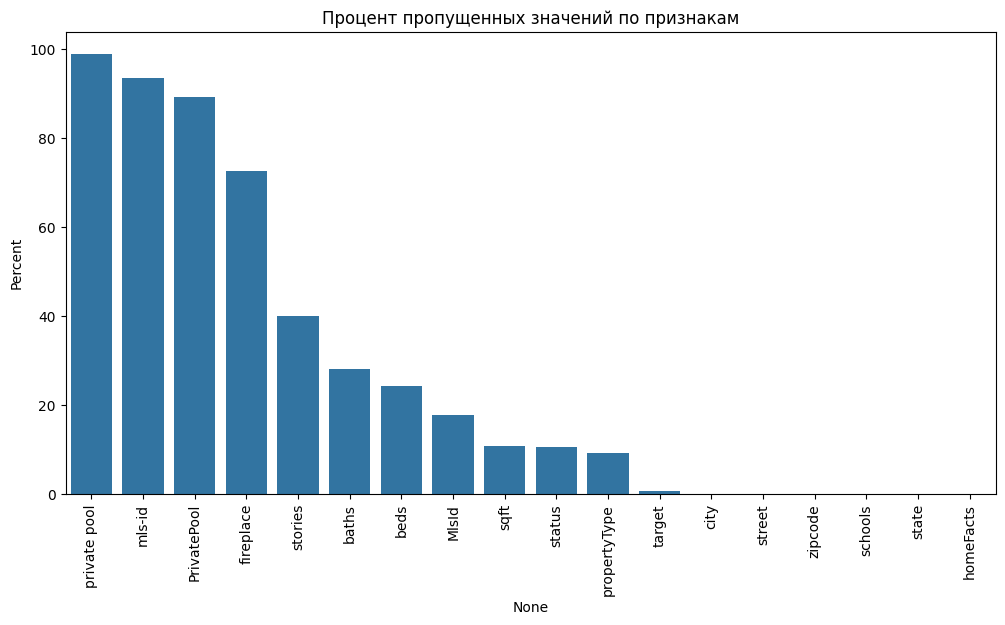

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Анализ пропущенных значений
missing_values = data.isnull().sum().sort_values(ascending=False)
percent_missing = (missing_values / len(data)) * 100

missing_data = pd.concat([missing_values, percent_missing], axis=1, keys=['Total', 'Percent'])
print("Пропущенные значения:\n", missing_data)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xticks(rotation=90)
plt.title('Процент пропущенных значений по признакам')
plt.show()


Вывод: Такие признаки как private pool, mls-id, PrivatePool, fireplace, stories имеют более 30% пропусков, что делает данные признаки малоинформативными для анализа. Напишем функцию для удаления данных признаков.

In [ ]:
def handle_missing_values(data, threshold=0.3):

    # Вычисление процента пропущенных значений
    missing_percentage = (data.isnull().sum() / len(data)) * 100

    # Выбор столбцов для удаления
    columns_to_drop = missing_percentage[missing_percentage > threshold * 100].index

    # Удаление столбцов
    data_1 = data.drop(columns=columns_to_drop)

    return data_1, missing_percentage

data_1, missing_percentage = handle_missing_values(data.copy()) # передаем копию, чтобы не менять исходный датафрейм

print("Процент пропущенных значений:\n", missing_percentage)
print("\nФорма исходного DataFrame:", data.shape)
print("Форма DataFrame после удаления столбцов:", data_1.shape)

Процент пропущенных значений:
 status          10.583136
private pool    98.891525
propertyType     9.208479
street           0.000530
baths           28.192532
homeFacts        0.000000
fireplace       72.662221
city             0.009014
schools          0.000000
sqft            10.757851
zipcode          0.000000
beds            24.200856
state            0.000000
stories         39.958111
mls-id          93.387330
PrivatePool     89.312672
MlsId           17.731352
target           0.657767
dtype: float64

Форма исходного DataFrame: (377185, 18)
Форма DataFrame после удаления столбцов: (377185, 13)


In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   propertyType  342452 non-null  object
 2   street        377183 non-null  object
 3   baths         270847 non-null  object
 4   homeFacts     377185 non-null  object
 5   city          377151 non-null  object
 6   schools       377185 non-null  object
 7   sqft          336608 non-null  object
 8   zipcode       377185 non-null  object
 9   beds          285903 non-null  object
 10  state         377185 non-null  object
 11  MlsId         310305 non-null  object
 12  target        374704 non-null  object
dtypes: object(13)
memory usage: 37.4+ MB


#**II. Подготовка данных**

#1. Очистка данных

###1.1. Определение категориальных и цифровых признаков

In [ ]:
data_1.head()

,status,propertyType,street,baths,homeFacts,city,schools,sqft,zipcode,beds,state,MlsId,target
0,Active,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,611019,"$418,000"
1,for sale,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,201916904,"$310,000"
2,for sale,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,FR19221027,"$2,895,000"
3,for sale,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,14191809,"$2,395,000"
4,for sale,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,NaN,FL,861745,"$5,000"


In [ ]:
categorical_features = ['status', 'propertyType', 'street', 'homeFacts', 'city', 'schools', 'state' ]
numerical_features = ['baths', 'sqft', 'zipcode', 'beds', 'MlsId' ]
target = 'target'

###1.2. Приведение цифровых признаков к цифровому виду

In [ ]:
def convert_to_numeric(data_1, numerical_features):

    df_converted = data_1.copy()

    for feature in numerical_features:
        if df_converted[feature].dtype == object: # Проверяем тип данных, если object - обрабатываем
            df_converted[feature] = df_converted[feature].astype(str).str.replace(r'[^\d.]', '', regex=True)
            df_converted[feature] = pd.to_numeric(df_converted[feature], errors='coerce')

    return df_converted


numerical_features_1 = ['baths', 'sqft', 'zipcode', 'beds', 'MlsId', 'target' ]

data_2 = convert_to_numeric(data_1, numerical_features_1)

In [ ]:
data_2.head()

,status,propertyType,street,baths,homeFacts,city,schools,sqft,zipcode,beds,state,MlsId,target
0,Active,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900.0,28387.0,4.0,NC,611019.0,418000.0
1,for sale,single-family home,12911 E Heroy Ave,3.0,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...",1947.0,99216.0,3.0,WA,201916904.0,310000.0
2,for sale,single-family home,2005 Westridge Rd,2.0,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...",3000.0,90049.0,3.0,CA,19221027.0,2895000.0
3,for sale,single-family home,4311 Livingston Ave,8.0,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...",6457.0,75205.0,5.0,TX,14191809.0,2395000.0
4,for sale,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908.0,NaN,FL,861745.0,5000.0


In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        337267 non-null  object 
 1   propertyType  342452 non-null  object 
 2   street        377183 non-null  object 
 3   baths         269347 non-null  float64
 4   homeFacts     377185 non-null  object 
 5   city          377151 non-null  object 
 6   schools       377185 non-null  object 
 7   sqft          335788 non-null  float64
 8   zipcode       377183 non-null  float64
 9   beds          268320 non-null  float64
 10  state         377185 non-null  object 
 11  MlsId         310199 non-null  float64
 12  target        374704 non-null  float64
dtypes: float64(6), object(7)
memory usage: 37.4+ MB


###1.3. Удаление мало информативного признака MlsId

Основываясь на интуитивном подходе улаляем признак MlsId

In [ ]:
def preprocess_data(data_2):

    df_processed = data_2.copy()

    # Приведение названий столбцов к нижнему регистру
    df_processed.columns = df_processed.columns.str.lower()

    # Удаление столбца 'mlsid' (если он существует после переименования)
    if 'mlsid' in df_processed.columns:
        df_processed.drop(columns=['mlsid'], inplace=True)
    elif 'mls-id' in df_processed.columns:
        df_processed.drop(columns=['mls-id'], inplace=True) # Or mls-id if it wasn't renamed yet
    elif 'MlsId' in df_processed.columns:
        df_processed.drop(columns=['MlsId'], inplace=True)

    return df_processed


data_3 = preprocess_data(data_2)


In [ ]:
data_3.head()

,status,propertytype,street,baths,homefacts,city,schools,sqft,zipcode,beds,state,target
0,Active,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900.0,28387.0,4.0,NC,418000.0
1,for sale,single-family home,12911 E Heroy Ave,3.0,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...",1947.0,99216.0,3.0,WA,310000.0
2,for sale,single-family home,2005 Westridge Rd,2.0,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...",3000.0,90049.0,3.0,CA,2895000.0
3,for sale,single-family home,4311 Livingston Ave,8.0,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...",6457.0,75205.0,5.0,TX,2395000.0
4,for sale,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908.0,NaN,FL,5000.0


###1.4. Удаление признака "schools"

Основываясь на интуитивном подходе удаляем признак "schools"

In [ ]:
data_3 = data_3.drop('schools', axis=1)


In [ ]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        337267 non-null  object 
 1   propertytype  342452 non-null  object 
 2   street        377183 non-null  object 
 3   baths         269347 non-null  float64
 4   homefacts     377185 non-null  object 
 5   city          377151 non-null  object 
 6   sqft          335788 non-null  float64
 7   zipcode       377183 non-null  float64
 8   beds          268320 non-null  float64
 9   state         377185 non-null  object 
 10  target        374704 non-null  float64
dtypes: float64(5), object(6)
memory usage: 31.7+ MB


#2. Преобразование признаков

###2.1. Проектирование новых признаков

Признак 'homefacts' представлен в виде словаря. Извлекаем информацию из словаря с созданием новых признаков.

In [ ]:
import ast
# Функция для извлечения информации из homeFacts
def extract_home_facts(home_facts):
    # Преобразуем строку в словарь, если это необходимо
    if isinstance(home_facts, str):
        home_facts = ast.literal_eval(home_facts)

    facts = {fact['factLabel']: fact['factValue'] for fact in home_facts['atAGlanceFacts']}
    return pd.Series({
        'Year built': facts.get('Year built'),
        'Remodeled year': facts.get('Remodeled year'),
        'Heating': facts.get('Heating'),
        'Cooling': facts.get('Cooling'),
        'Parking': facts.get('Parking'),
        'lotsize': facts.get('lotsize'),
        'Price/sqft': facts.get('Price/sqft')
    })

# Применение функции к столбцу homeFacts
new_facts = data_3['homefacts'].apply(extract_home_facts)

# Создание нового датафрейма с новыми признаками
data_4 = pd.concat([data_3.reset_index(drop=True), new_facts.reset_index(drop=True)], axis=1)

# Результат
data_4.head()





,status,propertytype,street,baths,homefacts,city,sqft,zipcode,beds,state,target,Year built,Remodeled year,Heating,Cooling,Parking,lotsize,Price/sqft
0,Active,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Southern Pines,2900.0,28387.0,4.0,NC,418000.0,2019,,"Central A/C, Heat Pump",,,None,$144
1,for sale,single-family home,12911 E Heroy Ave,3.0,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Spokane Valley,1947.0,99216.0,3.0,WA,310000.0,2019,,,,,5828 sqft,$159/sqft
2,for sale,single-family home,2005 Westridge Rd,2.0,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",Los Angeles,3000.0,90049.0,3.0,CA,2895000.0,1961,1967,Forced Air,Central,Attached Garage,"8,626 sqft",$965/sqft
3,for sale,single-family home,4311 Livingston Ave,8.0,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",Dallas,6457.0,75205.0,5.0,TX,2395000.0,2006,2006,Forced Air,Central,Detached Garage,"8,220 sqft",$371/sqft
4,for sale,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",Palm Bay,NaN,32908.0,NaN,FL,5000.0,,,,,,"10,019 sqft",None


###2.2. Анализ пропусков

Ввиду создания новых признаков проведем их оценку на пропуски и удалим признаки, которые содержат более 30% пропусков.

Пропущенные значения:
                  Total    Percent
beds            108865  28.862495
baths           107838  28.590214
Price/sqft       58553  15.523682
sqft             41397  10.975251
status           39918  10.583136
propertytype     34733   9.208479
lotsize          28388   7.526280
Remodeled year   26569   7.044023
Year built        3613   0.957885
Heating           3533   0.936676
Cooling           3533   0.936676
Parking           3533   0.936676
target            2481   0.657767
city                34   0.009014
zipcode              2   0.000530
street               2   0.000530
homefacts            0   0.000000
state                0   0.000000


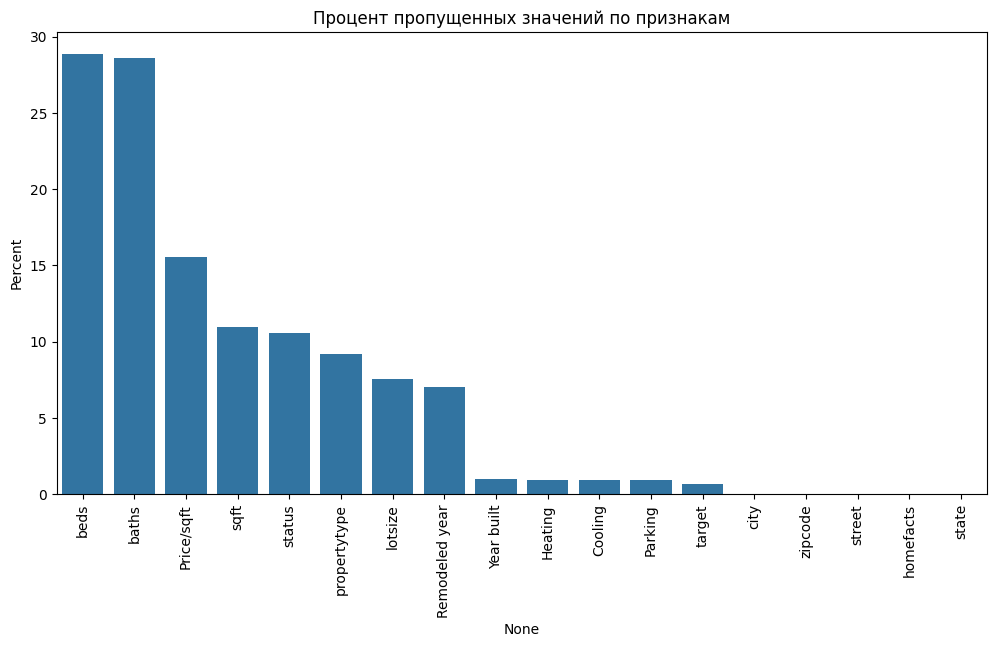

In [ ]:
missing_values = data_4.isnull().sum().sort_values(ascending=False)
percent_missing = (missing_values / len(data)) * 100

missing_data_1 = pd.concat([missing_values, percent_missing], axis=1, keys=['Total', 'Percent'])
print("Пропущенные значения:\n", missing_data_1)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_data_1.index, y=missing_data_1['Percent'])
plt.xticks(rotation=90)
plt.title('Процент пропущенных значений по признакам')
plt.show()

Вывод: Все признаки имеют менее 30% пропусков. Оставляем все вновь полученные признаки.

###2.3. Удаляем признак "homefacts"

Удаляем признак "homefacts" так из него извлечена вся необходимая информация.

In [ ]:
data_4 = data_4.drop('homefacts', axis=1)

In [ ]:
data_4.head(10)

,status,propertytype,street,baths,city,sqft,zipcode,beds,state,target,Year built,Remodeled year,Heating,Cooling,Parking,lotsize,Price/sqft
0,Active,Single Family Home,240 Heather Ln,3.5,Southern Pines,2900.0,28387.0,4.0,NC,418000.0,2019,,"Central A/C, Heat Pump",,,None,$144
1,for sale,single-family home,12911 E Heroy Ave,3.0,Spokane Valley,1947.0,99216.0,3.0,WA,310000.0,2019,,,,,5828 sqft,$159/sqft
2,for sale,single-family home,2005 Westridge Rd,2.0,Los Angeles,3000.0,90049.0,3.0,CA,2895000.0,1961,1967,Forced Air,Central,Attached Garage,"8,626 sqft",$965/sqft
3,for sale,single-family home,4311 Livingston Ave,8.0,Dallas,6457.0,75205.0,5.0,TX,2395000.0,2006,2006,Forced Air,Central,Detached Garage,"8,220 sqft",$371/sqft
4,for sale,lot/land,1524 Kiscoe St,NaN,Palm Bay,NaN,32908.0,NaN,FL,5000.0,,,,,,"10,019 sqft",None
5,for sale,townhouse,1624 S Newkirk St,NaN,Philadelphia,897.0,19145.0,2.0,PA,209000.0,1920,,Forced Air,Central,,680 sqft,$233/sqft
6,Active,Florida,552 Casanova Ct,NaN,POINCIANA,1507.0,34759.0,NaN,FL,181500.0,2006,2006,"Electric, Heat Pump",Central Air,,"4,996 Sq. Ft.",$120 / Sq. Ft.
7,Active,NaN,6094 Mingle Dr,NaN,Memphis,NaN,38115.0,NaN,TN,68000.0,1976,,,,,"8,750 Sq. Ft.",$57 / Sq. Ft.
8,Active,Single Family Home,11182 Owl Ave,2.0,Mason City,3588.0,50401.0,3.0,IA,244900.0,1970,,Forced Air,Central,,124582,$68
9,NaN,Single Family,8612 Cedar Plains Ln,3.0,Houston,1930.0,77080.0,3.0,TX,311995.0,2019,None,Gas,Central,Attached Garage,"2,056 sqft",$162


In [ ]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          337267 non-null  object 
 1   propertytype    342452 non-null  object 
 2   street          377183 non-null  object 
 3   baths           269347 non-null  float64
 4   city            377151 non-null  object 
 5   sqft            335788 non-null  float64
 6   zipcode         377183 non-null  float64
 7   beds            268320 non-null  float64
 8   state           377185 non-null  object 
 9   target          374704 non-null  float64
 10  Year built      373572 non-null  object 
 11  Remodeled year  350616 non-null  object 
 12  Heating         373652 non-null  object 
 13  Cooling         373652 non-null  object 
 14  Parking         373652 non-null  object 
 15  lotsize         348797 non-null  object 
 16  Price/sqft      318632 non-null  object 
dtypes: float64

###2.4. Уточняем цифровые и категориальные признаки

In [ ]:
categorical_features = ['status', 'propertytype', 'street', 'city', 'state', 'Heating', 'Cooling', 'Parking' ]
numerical_features = ['baths', 'sqft', 'zipcode', 'beds', 'Year built', 'Remodeled year', 'lotsize', 'Price/sqft' ]
target = 'target'

###2.5. Приведение цифровых признаков к цифровому виду

In [ ]:
def convert_to_numeric(data_4, numerical_features_1):

    df_converted = data_4.copy()

    for feature in numerical_features:
        if df_converted[feature].dtype == object: # Проверяем тип данных, если object - обрабатываем
            df_converted[feature] = df_converted[feature].astype(str).str.replace(r'[^\d.]', '', regex=True)
            df_converted[feature] = pd.to_numeric(df_converted[feature], errors='coerce')

    return df_converted


numerical_features_1 = ['Year built', 'Remodeled year', 'lotsize', 'Price/sqft' ]

data_5 = convert_to_numeric(data_4, numerical_features_1)
data_5.head()

,status,propertytype,street,baths,city,sqft,zipcode,beds,state,target,Year built,Remodeled year,Heating,Cooling,Parking,lotsize,Price/sqft
0,Active,Single Family Home,240 Heather Ln,3.5,Southern Pines,2900.0,28387.0,4.0,NC,418000.0,2019.0,NaN,"Central A/C, Heat Pump",,,NaN,144.0
1,for sale,single-family home,12911 E Heroy Ave,3.0,Spokane Valley,1947.0,99216.0,3.0,WA,310000.0,2019.0,NaN,,,,5828.0,159.0
2,for sale,single-family home,2005 Westridge Rd,2.0,Los Angeles,3000.0,90049.0,3.0,CA,2895000.0,1961.0,1967.0,Forced Air,Central,Attached Garage,8626.0,965.0
3,for sale,single-family home,4311 Livingston Ave,8.0,Dallas,6457.0,75205.0,5.0,TX,2395000.0,2006.0,2006.0,Forced Air,Central,Detached Garage,8220.0,371.0
4,for sale,lot/land,1524 Kiscoe St,NaN,Palm Bay,NaN,32908.0,NaN,FL,5000.0,NaN,NaN,,,,10019.0,NaN


In [ ]:
data_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          337267 non-null  object 
 1   propertytype    342452 non-null  object 
 2   street          377183 non-null  object 
 3   baths           269347 non-null  float64
 4   city            377151 non-null  object 
 5   sqft            335788 non-null  float64
 6   zipcode         377183 non-null  float64
 7   beds            268320 non-null  float64
 8   state           377185 non-null  object 
 9   target          374704 non-null  float64
 10  Year built      313589 non-null  float64
 11  Remodeled year  151075 non-null  float64
 12  Heating         373652 non-null  object 
 13  Cooling         373652 non-null  object 
 14  Parking         373652 non-null  object 
 15  lotsize         253635 non-null  float64
 16  Price/sqft      260997 non-null  float64
dtypes: float64

###2.6. Заполняем пропуски цифровых признаков медианными значениями

In [ ]:
import numpy as np
def fill_numerical_missing_values(data_5, numerical_features):

    df_filled = data_5.copy()

    for feature in numerical_features:
        if df_filled[feature].isnull().any(): # Проверяем, есть ли пропуски в столбце
            median_value = df_filled[feature].median()
            df_filled[feature].fillna(median_value, inplace=True)
        # Приводим к int, если тип данных - float и значения целые.
        if df_filled[feature].dtype == np.float64 and all(x.is_integer() for x in df_filled[feature].dropna()):
            df_filled[feature] = df_filled[feature].astype(int)

    return df_filled



# Пример использования (замените data_5 на ваш DataFrame)
numerical_features = ['baths', 'sqft', 'zipcode', 'beds', 'Year built', 'Remodeled year', 'lotsize', 'Price/sqft']
data_6 = fill_numerical_missing_values(data_5, numerical_features)




<ipython-input-25-a7c593e3fee6>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[feature].fillna(median_value, inplace=True)
<ipython-input-25-a7c593e3fee6>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:
data_6.head()

,status,propertytype,street,baths,city,sqft,zipcode,beds,state,target,Year built,Remodeled year,Heating,Cooling,Parking,lotsize,Price/sqft
0,Active,Single Family Home,240 Heather Ln,3.5,Southern Pines,2900,28387,4.0,NC,418000.0,2019,1986,"Central A/C, Heat Pump",,,4578.0,144
1,for sale,single-family home,12911 E Heroy Ave,3.0,Spokane Valley,1947,99216,3.0,WA,310000.0,2019,1986,,,,5828.0,159
2,for sale,single-family home,2005 Westridge Rd,2.0,Los Angeles,3000,90049,3.0,CA,2895000.0,1961,1967,Forced Air,Central,Attached Garage,8626.0,965
3,for sale,single-family home,4311 Livingston Ave,8.0,Dallas,6457,75205,5.0,TX,2395000.0,2006,2006,Forced Air,Central,Detached Garage,8220.0,371
4,for sale,lot/land,1524 Kiscoe St,2.5,Palm Bay,1800,32908,3.0,FL,5000.0,1985,1986,,,,10019.0,176


###2.7. Группировка значений признака "status" по ключевым словам

In [ ]:
top_30_status = data_6['status'].value_counts().nlargest(30)

print(top_30_status)

status
for sale                             156104
Active                               105207
For sale                              43465
foreclosure                            6426
New construction                       5475
Pending                                4702
Pre-foreclosure                        2119
Pre-foreclosure / auction              1560
P                                      1488
Under Contract Show                    1183
 / auction                              936
Under Contract   Showing                793
Active Under Contract                   718
New                                     690
Under Contract                          690
Contingent                              581
Price Change                            563
Auction                                 536
Foreclosed                              459
A Active                                443
for rent                                398
Foreclosure                             343
recently sold            

In [ ]:
import pandas as pd
import re

def clean_status(status):
  """Приводит статус к нижнему регистру и удаляет знаки препинания."""
  if pd.isna(status):
    return status # Возвращаем NaN как есть, если значение пропущено

  status = status.lower()
  status = re.sub(r'[^\w\s]', '', status)
  return status


data_6['status'] = data_6['status'].apply(clean_status)



In [ ]:
top_30_status = data_6['status'].value_counts().nlargest(30)

print(top_30_status)

status
for sale                             199571
active                               105207
foreclosure                            6769
new construction                       5475
pending                                4807
preforeclosure                         2119
preforeclosure  auction                1560
p                                      1488
under contract show                    1183
  auction                               936
under contract   showing                793
active under contract                   718
under contract                          692
new                                     690
contingent                              581
price change                            563
auction                                 536
foreclosed                              459
a active                                443
for rent                                398
recently sold                           287
under contract backups                  252
contingent finance and in

In [ ]:
# Формируем список ключевых слов: sale, active, foreclosure, new, pending, preforeclosure, contract, auction, rent, sold

In [ ]:
import pandas as pd

def categorize_status(status):
    """Категоризирует статус на основе ключевых слов."""
    if pd.isna(status):
        return 'other' # Обработка NaN

    keywords = ['sale', 'active', 'foreclosure', 'new', 'pending', 'preforeclosure', 'contract', 'auction', 'rent', 'sold']
    for keyword in keywords:
        if keyword in status: # Проверка наличия подстроки
            return keyword
    return 'other'

data_6['status'] = data_6['status'].apply(categorize_status)


In [ ]:
top_30_status = data_6['status'].value_counts().nlargest(30)

print(top_30_status)

status
sale           199634
active         106555
other           43831
foreclosure     10450
new              6165
pending          5327
contract         3050
auction          1472
rent              412
sold              289
Name: count, dtype: int64


###2.8. Группировка значений признака "propertytype"

In [ ]:
top_30_property_types = data_6['propertytype'].value_counts().nlargest(30)

print(top_30_property_types)

propertytype
single-family home               92206
Single Family                    62869
Single Family Home               31728
condo                            25968
lot/land                         20552
Condo                            16561
townhouse                        11464
Land                             10934
multi-family                      7900
Condo/Townhome/Row Home/Co-Op     7701
Townhouse                         6936
Traditional                       5913
coop                              3266
Multi Family                      2794
High Rise                         1823
Ranch                             1781
mobile/manufactured               1618
Detached, One Story               1614
Single Detached, Traditional      1581
Contemporary                      1557
Multi-Family Home                 1501
1 Story                           1234
Colonial                          1205
Mobile / Manufactured             1066
Contemporary/Modern               1000
2 Stories   

In [ ]:
# Формируем список ключевых слов
propertytype_key_words = ['single', 'condo', 'townhouse', 'land', 'traditional', 'coop', 'multi', 'rise', 'ranch', 'detached', 'apartment']

In [ ]:
import pandas as pd

def categorize_propertytype(propertytype):
    """Категоризирует тип недвижимости на основе ключевых слов."""
    if pd.isna(propertytype):
        return 'other'

    keywords = ['single', 'condo', 'townhouse', 'land', 'traditional', 'coop', 'multi', 'rise', 'ranch', 'detached', 'apartment']
    propertytype = str(propertytype).lower() # Приведение к нижнему регистру для надежности
    for keyword in keywords:
        if keyword in propertytype:
            return keyword
    return 'other'

data_6['propertytype'] = data_6['propertytype'].apply(categorize_propertytype)


In [ ]:
top_30_property_types = data_6['propertytype'].value_counts().nlargest(30)

print(top_30_property_types)

propertytype
single         190447
other           53110
condo           51225
land            31494
townhouse       18572
multi           12499
traditional      7566
coop             3801
ranch            2802
detached         2553
rise             2175
apartment         941
Name: count, dtype: int64


In [ ]:
data_6.head()

,status,propertytype,street,baths,city,sqft,zipcode,beds,state,target,Year built,Remodeled year,Heating,Cooling,Parking,lotsize,Price/sqft
0,active,single,240 Heather Ln,3.5,Southern Pines,2900,28387,4.0,NC,418000.0,2019,1986,"Central A/C, Heat Pump",,,4578.0,144
1,sale,single,12911 E Heroy Ave,3.0,Spokane Valley,1947,99216,3.0,WA,310000.0,2019,1986,,,,5828.0,159
2,sale,single,2005 Westridge Rd,2.0,Los Angeles,3000,90049,3.0,CA,2895000.0,1961,1967,Forced Air,Central,Attached Garage,8626.0,965
3,sale,single,4311 Livingston Ave,8.0,Dallas,6457,75205,5.0,TX,2395000.0,2006,2006,Forced Air,Central,Detached Garage,8220.0,371
4,sale,land,1524 Kiscoe St,2.5,Palm Bay,1800,32908,3.0,FL,5000.0,1985,1986,,,,10019.0,176


###2.9. Преобразуем признак "street"



In [ ]:
# Посмотрим топ 30 уникальных значений
top_30_street = data_6['street'].value_counts().nlargest(30)

print(top_30_street)

street
Address Not Disclosed          672
Undisclosed Address            517
(undisclosed Address)          391
Address Not Available          175
Unknown Address                 72
2103 E State Hwy 21             57
11305 Gulf Fwy                  54
17030 Youngblood Rd.            38
NE 58th Cir                     34
9470 Lancaster Rd. SW           32
1 Palmer Dr                     27
8426 Terrace Valley Circle      25
9845 Basil Western Rd NW        25
6320 SW 89th Court Road         24
8447 SW 99th Street Rd          22
5221 S. Zapata Hwy              20
Whitetail Trail                 19
Stone Bluff Drive               18
3435 Heather Garden Trail       17
2005 West Happy Valley Road     17
3423 Heather Garden Trail       17
Boncher Blvd                    17
1365 Neihart Way                17
24423 Ferdossa Drive            17
1727 Opal Field Lane            17
50 Leanni Way                   16
606 Vineyard Hollow Court       16
11 Pheasant Drive               16
1024 Dali Blv

In [ ]:
#Заменим пропуски и статусы, обозначающие отсутствие данных на "other"
data_6['street'] = data_6['street'].fillna('other') # Заменяем NaN на 'other'
data_6['street'] = data_6['street'].replace(['Address Not Disclosed', 'Undisclosed Address', '(undisclosed Address)', 'Address Not Available', 'Unknown Address'], 'other')

In [ ]:
top_30_street = data_6['street'].value_counts().nlargest(30)

print(top_30_street)

street
other                            1829
2103 E State Hwy 21                57
11305 Gulf Fwy                     54
17030 Youngblood Rd.               38
NE 58th Cir                        34
9470 Lancaster Rd. SW              32
1 Palmer Dr                        27
8426 Terrace Valley Circle         25
9845 Basil Western Rd NW           25
6320 SW 89th Court Road            24
8447 SW 99th Street Rd             22
5221 S. Zapata Hwy                 20
Whitetail Trail                    19
Stone Bluff Drive                  18
1727 Opal Field Lane               17
Boncher Blvd                       17
3423 Heather Garden Trail          17
2005 West Happy Valley Road        17
3435 Heather Garden Trail          17
24423 Ferdossa Drive               17
1365 Neihart Way                   17
11 Pheasant Drive                  16
606 Vineyard Hollow Court          16
50 Leanni Way                      16
1024 Dali Blvd.                    16
9915 Camellia Gardens Drive        15
13410

In [ ]:
data_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          377185 non-null  object 
 1   propertytype    377185 non-null  object 
 2   street          377185 non-null  object 
 3   baths           377185 non-null  float64
 4   city            377151 non-null  object 
 5   sqft            377185 non-null  int64  
 6   zipcode         377185 non-null  int64  
 7   beds            377185 non-null  float64
 8   state           377185 non-null  object 
 9   target          374704 non-null  float64
 10  Year built      377185 non-null  int64  
 11  Remodeled year  377185 non-null  int64  
 12  Heating         373652 non-null  object 
 13  Cooling         373652 non-null  object 
 14  Parking         373652 non-null  object 
 15  lotsize         377185 non-null  float64
 16  Price/sqft      377185 non-null  int64  
dtypes: float64

In [ ]:
n_unique_streets = data_6['street'].nunique()
print(f"Количество уникальных статусов в 'street': {n_unique_streets}")


Количество уникальных статусов в 'street': 337072


В данном случае, когда признак "street" представляет собой адрес недвижимости, а целевая переменная - стоимость недвижимости, можно рассмотреть следующие методы кодирования:

1. **Target Encoding**: Этот метод может быть особенно полезен в вашем случае. Вы можете заменить каждое уникальное значение в признаке "street" на среднюю стоимость недвижимости (target) для этого адреса. Это позволит сохранить информацию о влиянии каждого адреса на стоимость.

In [ ]:
data_6.head()

,status,propertytype,street,baths,city,sqft,zipcode,beds,state,target,Year built,Remodeled year,Heating,Cooling,Parking,lotsize,Price/sqft
0,active,single,240 Heather Ln,3.5,Southern Pines,2900,28387,4.0,NC,418000.0,2019,1986,"Central A/C, Heat Pump",,,4578.0,144
1,sale,single,12911 E Heroy Ave,3.0,Spokane Valley,1947,99216,3.0,WA,310000.0,2019,1986,,,,5828.0,159
2,sale,single,2005 Westridge Rd,2.0,Los Angeles,3000,90049,3.0,CA,2895000.0,1961,1967,Forced Air,Central,Attached Garage,8626.0,965
3,sale,single,4311 Livingston Ave,8.0,Dallas,6457,75205,5.0,TX,2395000.0,2006,2006,Forced Air,Central,Detached Garage,8220.0,371
4,sale,land,1524 Kiscoe St,2.5,Palm Bay,1800,32908,3.0,FL,5000.0,1985,1986,,,,10019.0,176


###2.10. Преобразуем признак "city"

In [ ]:
# Посмотрим топ 30 уникальных значений
top_30_city = data_6['city'].value_counts().nlargest(30)

print(top_30_city)

city
Houston             24442
San Antonio         15592
Miami               15524
Jacksonville        10015
Dallas               8856
Brooklyn             7291
Chicago              6968
New York             6919
Charlotte            6543
Las Vegas            6006
Fort Worth           5518
Orlando              5230
Austin               5155
Fort Lauderdale      5103
Cleveland            5029
Nashville            5011
Tampa                4833
Philadelphia         4797
Washington           4674
Los Angeles          4174
Seattle              4081
Atlanta              3976
Ocala                3323
Palm Coast           3248
Detroit              3134
Kissimmee            3116
Indianapolis         2709
Miami Beach          2634
Saint Petersburg     2551
Memphis              2506
Name: count, dtype: int64


In [ ]:
#Заменим пропуски и статусы, обозначающие отсутствие данных на "other"
data_6['city'] = data_6['city'].fillna('other') # Заменяем NaN на 'other'

###2.11. Преобразуем признак "Heating"

In [ ]:
# Посмотрим топ 30 уникальных значений
top_30_Heating = data_6['Heating'].value_counts().nlargest(30)

print(top_30_Heating)

Heating
                               105799
Forced Air                      82807
Forced air                      51506
Other                           29623
Electric                        10211
Gas                              9296
No Data                          8611
Central Air                      7814
Central Electric                 7112
Central                          6247
Heat Pump                        6104
Central, Electric                4253
Baseboard                        3815
Wall                             3301
Electric Heat                    3064
Heat pump                        2747
Heating System                   2709
Forced air, Heat pump            1727
Radiant                          1485
Central Air, Ceiling Fan(s)      1432
Natural Gas Heat                 1383
Central Furnace                  1036
Forced Air, Gas                   962
Central Electric, Zoned           873
Forced Air Heating                810
, Gas Hot Air/Furnace             776
Gas 

In [ ]:
# Посмотрим топ 30 уникальных значений
top_30_Heating = data_6['Heating'].value_counts().nlargest(30)

print(top_30_Heating)

Heating
                               105799
Forced Air                      82807
Forced air                      51506
Other                           29623
Electric                        10211
Gas                              9296
No Data                          8611
Central Air                      7814
Central Electric                 7112
Central                          6247
Heat Pump                        6104
Central, Electric                4253
Baseboard                        3815
Wall                             3301
Electric Heat                    3064
Heat pump                        2747
Heating System                   2709
Forced air, Heat pump            1727
Radiant                          1485
Central Air, Ceiling Fan(s)      1432
Natural Gas Heat                 1383
Central Furnace                  1036
Forced Air, Gas                   962
Central Electric, Zoned           873
Forced Air Heating                810
, Gas Hot Air/Furnace             776
Gas 

При выводе топ 30 уникальных значений признака 'Heating' видно, что есть пустое значение признака, но как пропуск это значение не читается. Судя по выводу, статус с частотой 105799 представлен пробелами. Pandas не распознает его как NaN, но при выводе `value_counts()` он отображается как пустая строка. Проведем преобразования ниже:

In [ ]:
# Выводим количество строк с пустым значением 'Heating'
empty_heating_count = data_6['Heating'][data_6['Heating'] == ''].count()
print(f"Количество пустых строк в 'Heating': {empty_heating_count}")

# Заменяем пустые строки на 'other'
data_6['Heating'] = data_6['Heating'].replace('', 'other')
data_6['Heating'] = data_6['Heating'].fillna('other') # заполняем пропуски

# Проверяем результат
heating_counts = data_6['Heating'].value_counts()
print(heating_counts)


Количество пустых строк в 'Heating': 105799
Heating
other                                                           109332
Forced Air                                                       82807
Forced air                                                       51506
Other                                                            29623
Electric                                                         10211
                                                                 ...  
Natural Gas, Space Heater                                            1
Exhaust Fans                                                         1
Central, Exhaust Fans, Natural Gas, Zoned                            1
BR Closet-Electric - new                                             1
Baseboard, Hot Water, Programmable Thermostat, Radiant Floor         1
Name: count, Length: 1984, dtype: int64


In [ ]:
# Посмотрим топ 30 уникальных значений
top_30_Heating = data_6['Heating'].value_counts().nlargest(30)

print(top_30_Heating)

Heating
other                          109332
Forced Air                      82807
Forced air                      51506
Other                           29623
Electric                        10211
Gas                              9296
No Data                          8611
Central Air                      7814
Central Electric                 7112
Central                          6247
Heat Pump                        6104
Central, Electric                4253
Baseboard                        3815
Wall                             3301
Electric Heat                    3064
Heat pump                        2747
Heating System                   2709
Forced air, Heat pump            1727
Radiant                          1485
Central Air, Ceiling Fan(s)      1432
Natural Gas Heat                 1383
Central Furnace                  1036
Forced Air, Gas                   962
Central Electric, Zoned           873
Forced Air Heating                810
, Gas Hot Air/Furnace             776
Gas 

In [ ]:
# Создадим словарь ключевых слов
heating_key_words = ['forced', 'electric', 'gas', 'pump', 'central', 'baseboard', 'radiant']

In [ ]:
def replace_heating_status(status):
    for keyword in heating_key_words:
        if keyword in status:
            return keyword
    return 'other'

data_6['Heating'] = data_6['Heating'].apply(replace_heating_status)

In [ ]:
# Посмотрим топ 30 уникальных значений
top_30_Heating = data_6['Heating'].value_counts().nlargest(30)

print(top_30_Heating)

Heating
other       372392
pump          4727
electric        44
gas             21
central          1
Name: count, dtype: int64


In [ ]:
data_6.head()

,status,propertytype,street,baths,city,sqft,zipcode,beds,state,target,Year built,Remodeled year,Heating,Cooling,Parking,lotsize,Price/sqft
0,active,single,240 Heather Ln,3.5,Southern Pines,2900,28387,4.0,NC,418000.0,2019,1986,other,,,4578.0,144
1,sale,single,12911 E Heroy Ave,3.0,Spokane Valley,1947,99216,3.0,WA,310000.0,2019,1986,other,,,5828.0,159
2,sale,single,2005 Westridge Rd,2.0,Los Angeles,3000,90049,3.0,CA,2895000.0,1961,1967,other,Central,Attached Garage,8626.0,965
3,sale,single,4311 Livingston Ave,8.0,Dallas,6457,75205,5.0,TX,2395000.0,2006,2006,other,Central,Detached Garage,8220.0,371
4,sale,land,1524 Kiscoe St,2.5,Palm Bay,1800,32908,3.0,FL,5000.0,1985,1986,other,,,10019.0,176


###2.12. Преобразуем признак "Cooling"

In [ ]:
# Посмотрим топ 30 уникальных значений
top_30_сooling = data_6['Cooling'].value_counts().nlargest(30)

print(top_30_сooling)

Cooling
Central                                            158754
                                                   120434
Central Air                                         14384
No Data                                             10616
Has Cooling                                          9730
None                                                 7390
Central Electric                                     6154
Wall                                                 4018
Central Gas                                          3573
Central Heating                                      2807
Cooling System                                       2700
Central A/C                                          2051
Other                                                1840
Central A/C (Electric), Central Heat (Gas)           1646
Central A/C (Electric), Central Heat (Electric)      1429
Refrigeration                                        1075
Central, Electric                                    1060
Electr

При выводе топ 30 уникальных значений признака 'Cooling' видно, что есть пустое значение признака, но как пропуск это значение не читается. Судя по выводу, статус с частотой 120434 представлен пробелами. Pandas не распознает его как NaN, но при выводе value_counts() он отображается как пустая строка. Проведем преобразования ниже:

In [ ]:
# Выводим количество строк с пустым значением 'Cooling'
empty_cooling_count = data_6['Cooling'][data_6['Cooling'] == ''].count()
print(f"Количество пустых строк в 'Cooling': {empty_heating_count}")

# Заменяем пустые строки на 'other'
data_6['Cooling'] = data_6['Cooling'].replace('', 'other')
data_6['Cooling'] = data_6['Cooling'].fillna('other') # заполняем пропуски

# Проверяем результат
cooling_counts = data_6['Cooling'].value_counts()
print(cooling_counts)

Количество пустых строк в 'Cooling': 105799
Cooling
Central                                                                158754
other                                                                  123967
Central Air                                                             14384
No Data                                                                 10616
Has Cooling                                                              9730
                                                                        ...  
Central Gas, Propane, Zoned                                                 1
Other (See Remarks), Panel/Floor/Wall, Window Unit                          1
Multi Units, Zoned Cooling                                                  1
Central Air, g-Energy Star HVAC, Gas Hot Air/Furnace, Multizone A/C         1
Central A/C (Gas), Central Heat (Gas), Heat Pump                            1
Name: count, Length: 1445, dtype: int64


In [ ]:
data_6['Cooling'] = data_6['Cooling'].fillna('other') # Заполняем пропуски 'other'
data_6['Cooling'] = data_6['Cooling'].str.lower() # Приводим к нижнему регистру

# Удаляем знаки препинания
data_6['Cooling'] = data_6['Cooling'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [ ]:
# Посмотрим топ 30 уникальных значений
top_30_cooling = data_6['Cooling'].value_counts().nlargest(30)

print(top_30_cooling)

Cooling
central                                      158754
other                                        125807
central air                                   14385
no data                                       10616
has cooling                                    9730
none                                           7390
central electric                               7214
wall                                           4018
central gas                                    3573
central heating                                2807
cooling system                                 2710
central ac                                     2130
central ac electric central heat gas           1646
central ac electric central heat electric      1429
refrigeration                                  1075
electric                                       1012
evaporative                                    1011
central air gas hot airfurnace                  827
refrigeration ceiling fans                      787
cent

In [ ]:
# Создадим словарь ключевых слов
cooling_key_words = ['central', 'cooling', 'refrigeration']

In [ ]:
def replace_cooling_status(status):
    for keyword in cooling_key_words:
        if keyword in status:
            return keyword
    return 'other'

data_6['Cooling'] = data_6['Cooling'].apply(replace_cooling_status)

In [ ]:
# Посмотрим топ 30 уникальных значений
top_30_cooling = data_6['Cooling'].value_counts().nlargest(30)

print(top_30_cooling)

Cooling
central          204545
other            157295
cooling           12728
refrigeration      2617
Name: count, dtype: int64


In [ ]:
data_6.head()

,status,propertytype,street,baths,city,sqft,zipcode,beds,state,target,Year built,Remodeled year,Heating,Cooling,Parking,lotsize,Price/sqft
0,active,single,240 Heather Ln,3.5,Southern Pines,2900,28387,4.0,NC,418000.0,2019,1986,other,other,,4578.0,144
1,sale,single,12911 E Heroy Ave,3.0,Spokane Valley,1947,99216,3.0,WA,310000.0,2019,1986,other,other,,5828.0,159
2,sale,single,2005 Westridge Rd,2.0,Los Angeles,3000,90049,3.0,CA,2895000.0,1961,1967,other,central,Attached Garage,8626.0,965
3,sale,single,4311 Livingston Ave,8.0,Dallas,6457,75205,5.0,TX,2395000.0,2006,2006,other,central,Detached Garage,8220.0,371
4,sale,land,1524 Kiscoe St,2.5,Palm Bay,1800,32908,3.0,FL,5000.0,1985,1986,other,other,,10019.0,176


###2.13. Преобразуем признак "Parking"

In [ ]:
data_6['Parking'] = data_6['Parking'].fillna('other') # Заполняем пропуски
data_6['Parking'] = data_6['Parking'].str.lower() # Приводим к нижнему регистру

# Удаляем знаки препинания
data_6['Parking'] = data_6['Parking'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [ ]:
# Посмотрим топ 30 уникальных значений
top_30_parking = data_6['Parking'].value_counts().nlargest(30)

print(top_30_parking)

Parking
                                   171887
attached garage                     70753
2 spaces                            28083
1 space                             14252
no data                             13334
detached garage                     13201
carport                              7744
off street                           5279
3 spaces                             4724
other                                3534
carport attached garage              3025
1                                    2936
4 spaces                             2917
2                                    2756
none                                 2369
on street                            1707
attached garage detached garage      1354
0                                    1114
attached garage carport               993
parking desc                          900
6 spaces                              755
detached garage attached garage       726
driveway                              693
5 spaces                  

In [ ]:
# Преобразуем значение признака с частотой 171887
# Выводим количество строк с пустым значением 'Parking'
empty_parking_count = data_6['Parking'][data_6['Parking'] == ''].count()
print(f"Количество пустых строк в 'Parking': {empty_parking_count}")

# Заменяем пустые строки на 'other' (или другое значение по вашему выбору)
data_6['Parking'] = data_6['Parking'].replace('', 'other')


Количество пустых строк в 'Parking': 171887


In [ ]:
# Посмотрим топ 30 уникальных значений
top_30_parking = data_6['Parking'].value_counts().nlargest(30)

print(top_30_parking)

Parking
other                              175421
attached garage                     70753
2 spaces                            28083
1 space                             14252
no data                             13334
detached garage                     13201
carport                              7744
off street                           5279
3 spaces                             4724
carport attached garage              3025
1                                    2936
4 spaces                             2917
2                                    2756
none                                 2369
on street                            1707
attached garage detached garage      1354
0                                    1114
attached garage carport               993
parking desc                          900
6 spaces                              755
detached garage attached garage       726
driveway                              693
5 spaces                              655
4                         

In [ ]:
# Создадим словарь ключевых слов
parking_key_words = ['garage', '1', '2', '3', '4', '5', '6', 'carport', 'off', 'on', 'parking', 'driveway']

In [ ]:
def replace_parking_status(status):
    for keyword in parking_key_words:
        if keyword in status:
            return keyword
    return 'other'

data_6['Parking'] = data_6['Parking'].apply(replace_parking_status)

In [ ]:
# Посмотрим топ 30 уникальных значений
top_30_parking = data_6['Parking'].value_counts().nlargest(30)

print(top_30_parking)

Parking
other       193020
garage       99405
2            31391
1            17902
carport       8494
off           6809
on            5477
3             5284
4             3616
parking       3074
6              967
driveway       937
5              809
Name: count, dtype: int64


In [ ]:
data_6.head()

,status,propertytype,street,baths,city,sqft,zipcode,beds,state,target,Year built,Remodeled year,Heating,Cooling,Parking,lotsize,Price/sqft
0,active,single,240 Heather Ln,3.5,Southern Pines,2900,28387,4.0,NC,418000.0,2019,1986,other,other,other,4578.0,144
1,sale,single,12911 E Heroy Ave,3.0,Spokane Valley,1947,99216,3.0,WA,310000.0,2019,1986,other,other,other,5828.0,159
2,sale,single,2005 Westridge Rd,2.0,Los Angeles,3000,90049,3.0,CA,2895000.0,1961,1967,other,central,garage,8626.0,965
3,sale,single,4311 Livingston Ave,8.0,Dallas,6457,75205,5.0,TX,2395000.0,2006,2006,other,central,garage,8220.0,371
4,sale,land,1524 Kiscoe St,2.5,Palm Bay,1800,32908,3.0,FL,5000.0,1985,1986,other,other,other,10019.0,176


In [ ]:
data_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          377185 non-null  object 
 1   propertytype    377185 non-null  object 
 2   street          377185 non-null  object 
 3   baths           377185 non-null  float64
 4   city            377185 non-null  object 
 5   sqft            377185 non-null  int64  
 6   zipcode         377185 non-null  int64  
 7   beds            377185 non-null  float64
 8   state           377185 non-null  object 
 9   target          374704 non-null  float64
 10  Year built      377185 non-null  int64  
 11  Remodeled year  377185 non-null  int64  
 12  Heating         377185 non-null  object 
 13  Cooling         377185 non-null  object 
 14  Parking         377185 non-null  object 
 15  lotsize         377185 non-null  float64
 16  Price/sqft      377185 non-null  int64  
dtypes: float64

In [ ]:
data_6.to_csv('data_7.csv', index=False)

In [ ]:
data_7 = pd.read_csv('/content/data_7.csv')

In [ ]:
data_7.head()

,status,propertytype,street,baths,city,sqft,zipcode,beds,state,target,Year built,Remodeled year,Heating,Cooling,Parking,lotsize,Price/sqft
0,active,single,240 Heather Ln,3.5,Southern Pines,2900,28387,4.0,NC,418000.0,2019,1986,other,other,other,4578.0,144
1,sale,single,12911 E Heroy Ave,3.0,Spokane Valley,1947,99216,3.0,WA,310000.0,2019,1986,other,other,other,5828.0,159
2,sale,single,2005 Westridge Rd,2.0,Los Angeles,3000,90049,3.0,CA,2895000.0,1961,1967,other,central,garage,8626.0,965
3,sale,single,4311 Livingston Ave,8.0,Dallas,6457,75205,5.0,TX,2395000.0,2006,2006,other,central,garage,8220.0,371
4,sale,land,1524 Kiscoe St,2.5,Palm Bay,1800,32908,3.0,FL,5000.0,1985,1986,other,other,other,10019.0,176


In [ ]:
# Или медианой:
median_target = data_7['target'].median()
data_7['target'] = data_7['target'].fillna(median_target)


In [ ]:
data_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          377185 non-null  object 
 1   propertytype    377185 non-null  object 
 2   street          377185 non-null  object 
 3   baths           377185 non-null  float64
 4   city            377185 non-null  object 
 5   sqft            377185 non-null  int64  
 6   zipcode         377185 non-null  int64  
 7   beds            377185 non-null  float64
 8   state           377185 non-null  object 
 9   target          377185 non-null  float64
 10  Year built      377185 non-null  int64  
 11  Remodeled year  377185 non-null  int64  
 12  Heating         377185 non-null  object 
 13  Cooling         377185 non-null  object 
 14  Parking         377185 non-null  object 
 15  lotsize         377185 non-null  float64
 16  Price/sqft      377185 non-null  int64  
dtypes: float64

###2.13.Проверка числовых признаков на выбросы

In [ ]:
numerical_features = ['baths', 'sqft', 'beds', 'Year built', 'Remodeled year', 'lotsize', 'Price/sqft', 'target']


# 1. Метод межквартильного размаха (IQR):
for feature in numerical_features:
    Q1 = data_7[feature].quantile(0.25)
    Q3 = data_7[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_7[(data_7[feature] < lower_bound) | (data_7[feature] > upper_bound)]
    percentage = (len(outliers) / len(data_7)) * 100
    print(f"Процент выбросов для {feature} (IQR): {percentage:.2f}%")

Процент выбросов для baths (IQR): 10.00%
Процент выбросов для sqft (IQR): 6.21%
Процент выбросов для beds (IQR): 5.66%
Процент выбросов для Year built (IQR): 0.99%
Процент выбросов для Remodeled year (IQR): 39.59%
Процент выбросов для lotsize (IQR): 4.45%
Процент выбросов для Price/sqft (IQR): 14.57%
Процент выбросов для target (IQR): 10.22%


Выводы:

* `baths` (10.00%): Достаточно высокий процент. Можно применить winsorization (винзоризацию) – ограничение значений сверху и снизу определенными квантилями (например, 95% и 5%). Это позволит сохранить информацию о распределении, но ограничить влияние крайних значений.

* `sqft` (6.21%): Умеренный процент. Winsorization также подходит, или можно попробовать логарифмическое преобразование, если распределение скошено.

* `beds` (5.66%): Похоже на `sqft`, winsorization или логарифмическое преобразование.

* `Year built` (0.99%): Очень низкий процент. Можно удалить эти выбросы, так как их мало и они вряд ли сильно повлияют на результаты.

* `Remodeled year` (39.59%): Аномально высокий процент. Возможно, есть проблема с данными (например, год указан неверно или используется заполнитель для пропущенных значений). Лучше рассмотреть удаление признака целиком.

* `lotsize` (4.45%): Низкий процент. Winsorization.

* `Price/sqft` (14.57%): Достаточно высокий процент. Winsorization или логарифмическое преобразование.

In [ ]:
# Вычисление границ для 'Year built' (метод IQR)
Q1_year_built = data_7['Year built'].quantile(0.25)
Q3_year_built = data_7['Year built'].quantile(0.75)
IQR_year_built = Q3_year_built - Q1_year_built
lower_bound_year_built = Q1_year_built - 1.5 * IQR_year_built
upper_bound_year_built = Q3_year_built + 1.5 * IQR_year_built

In [ ]:
from scipy.stats.mstats import winsorize

# Winsorization:
data_7['baths'] = winsorize(data_7['baths'], limits=[0.05, 0.05]) # 5% сверху и снизу
data_7['target'] = winsorize(data_7['target'], limits=[0.05, 0.05]) # 5% сверху и снизу
data_7['sqft'] = winsorize(data_7['sqft'], limits=[0.05, 0.05])
data_7['beds'] = winsorize(data_7['beds'], limits=[0.05, 0.05])
data_7['lotsize'] = winsorize(data_7['lotsize'], limits=[0.05, 0.05])
data_7['Price/sqft'] = winsorize(data_7['Price/sqft'], limits=[0.05, 0.05])
data_7['Year built'] = winsorize(data_7['Year built'], limits=[0.05, 0.05])
# Логарифмическое преобразование:
data_7['sqft'] = np.log1p(data_7['sqft']) # np.log1p() обрабатывает нулевые значения

# Удаление:
#data_7 = data_7[data_7['Year built'].between(lower_bound_year_built, upper_bound_year_built)]

# Удаление признака:
data_7 = data_7.drop('Remodeled year', axis=1)


In [ ]:
data_7.head()

,status,propertytype,street,baths,city,sqft,zipcode,beds,state,target,Year built,Heating,Cooling,Parking,lotsize,Price/sqft
0,active,single,240 Heather Ln,3.5,Southern Pines,7.972811,28387,4.0,NC,418000.0,2019,other,other,other,4578.0,144
1,sale,single,12911 E Heroy Ave,3.0,Spokane Valley,7.574558,99216,3.0,WA,310000.0,2019,other,other,other,5828.0,159
2,sale,single,2005 Westridge Rd,2.0,Los Angeles,8.006701,90049,3.0,CA,1950000.0,1961,other,central,garage,8626.0,636
3,sale,single,4311 Livingston Ave,7.0,Dallas,8.415603,75205,5.0,TX,1950000.0,2006,other,central,garage,8220.0,371
4,sale,land,1524 Kiscoe St,2.5,Palm Bay,7.496097,32908,3.0,FL,36500.0,1985,other,other,other,10019.0,176


###2.14. Маштабирование числовых признаков

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Выбираем числовые признаки для масштабирования
numerical_features = ['baths', 'sqft', 'beds', 'Year built', 'lotsize', 'Price/sqft', 'target']

# Способ 1: MinMaxScaler (масштабирование от 0 до 1)
scaler_minmax = MinMaxScaler()
data_7[numerical_features] = scaler_minmax.fit_transform(data_7[numerical_features])

In [ ]:
data_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        377185 non-null  object 
 1   propertytype  377185 non-null  object 
 2   street        377185 non-null  object 
 3   baths         377185 non-null  float64
 4   city          377185 non-null  object 
 5   sqft          377185 non-null  float64
 6   zipcode       377185 non-null  int64  
 7   beds          377185 non-null  float64
 8   state         377185 non-null  object 
 9   target        377185 non-null  float64
 10  Year built    377185 non-null  float64
 11  Heating       377185 non-null  object 
 12  Cooling       377185 non-null  object 
 13  Parking       377185 non-null  object 
 14  lotsize       377185 non-null  float64
 15  Price/sqft    377185 non-null  float64
dtypes: float64(7), int64(1), object(8)
memory usage: 46.0+ MB


###2.15. Кодирование категориальных признаков

Выбор методов для каждого признака:

* `status`: Это бинарный признак (например, "продано"/"не продано"). Используем One-Hot Encoding, так как значений больше двух.

* `propertytype`: Здесь несколько категорий (например, "дом", "квартира", "таунхаус"). Так как нет явной иерархии между категориями, используем One-Hot Encoding.

* `street`, `city`, `state`: Эти признаки содержат много уникальных значений. Target Encoding или Frequency Encoding могут быть хорошими вариантами для уменьшения размерности.

* `Heating`, `Cooling`, `Parking`: Здесь ограниченное количество категорий. One-Hot Encoding подойдет, так как категорий немного, т.е. меньше 15.


In [ ]:
!pip install category-encoders


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, TargetEncoder
from category_encoders import HashingEncoder


# One-Hot Encoding для status
ohe_status = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_status = ohe_status.fit_transform(data_7[['status']])
encoded_status_df = pd.DataFrame(encoded_status, columns=ohe_status.get_feature_names_out(['status']))
data_7 = data_7.drop('status', axis=1)
data_7 = pd.concat([data_7, encoded_status_df], axis=1)

# One-Hot Encoding для propertytype, Heating, Cooling, Parking
ohe_features = ['propertytype', 'Heating', 'Cooling', 'Parking']
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse=False для numpy массива
encoded_features = ohe.fit_transform(data_7[ohe_features])
encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(ohe_features))
data_7 = data_7.drop(ohe_features, axis=1)
data_7 = pd.concat([data_7, encoded_df], axis=1)

# Target Encoding для street, city, state
te = TargetEncoder()
data_7['street'] = te.fit_transform(data_7[['street']], data_7['target'])
data_7['city'] = te.fit_transform(data_7[['city']], data_7['target'])
data_7['state'] = te.fit_transform(data_7[['state']], data_7['target'])





In [ ]:
data_7.head()

,street,baths,city,sqft,zipcode,beds,state,target,Year built,lotsize,...,Parking_4,Parking_5,Parking_6,Parking_carport,Parking_driveway,Parking_garage,Parking_off,Parking_on,Parking_other,Parking_parking
0,0.234942,0.416667,0.180251,0.767787,28387,0.666667,0.182172,0.199373,1.000000,0.404186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.234650,0.333333,0.146909,0.558931,99216,0.333333,0.306825,0.142932,1.000000,0.514555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.234942,0.166667,0.585979,0.785559,90049,0.333333,0.440734,1.000000,0.414141,0.761604,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.234942,1.000000,0.271576,1.000000,75205,1.000000,0.193003,1.000000,0.868687,0.725756,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.234662,0.250000,0.057392,0.517784,32908,0.333333,0.208271,0.000000,0.656566,0.884599,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
data_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 55 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   street                    377185 non-null  float64
 1   baths                     377185 non-null  float64
 2   city                      377185 non-null  float64
 3   sqft                      377185 non-null  float64
 4   zipcode                   377185 non-null  int64  
 5   beds                      377185 non-null  float64
 6   state                     377185 non-null  float64
 7   target                    377185 non-null  float64
 8   Year built                377185 non-null  float64
 9   lotsize                   377185 non-null  float64
 10  Price/sqft                377185 non-null  float64
 11  status_active             377185 non-null  float64
 12  status_auction            377185 non-null  float64
 13  status_contract           377185 non-null  f

###2.16. Отбор наиболее значимых признаков на основе анализа мультиколлинеарности.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# Корреляция
correlations = data_7.corr()['target'].abs().sort_values(ascending=False)
print(correlations)

target                      1.000000
Price/sqft                  0.603102
city                        0.599480
sqft                        0.464078
street                      0.407670
state                       0.394626
baths                       0.382027
beds                        0.263086
propertytype_land           0.150998
lotsize                     0.112461
propertytype_multi          0.100802
status_foreclosure          0.079253
Parking_3                   0.060096
Parking_garage              0.058890
Parking_other               0.057830
Parking_4                   0.055298
propertytype_condo          0.051373
Cooling_other               0.049383
Parking_5                   0.047190
propertytype_detached       0.044796
Parking_6                   0.042617
status_pending              0.041852
Cooling_cooling             0.039578
Cooling_central             0.039405
Parking_carport             0.037449
Year built                  0.037031
status_new                  0.032887
s

Вывод по результатам корреляции признаков с целевой переменной `target`:

* Сильная положительная корреляция: `Price/sqft`, `city`, `sqft`, `street`, `state`, `baths` имеют наибольшую корреляцию с `target`, что указывает на сильную линейную зависимость. Увеличение значений этих признаков, вероятно, связано с увеличением `target`. Особенно выделяется `Price/sqft`, имеющая очень высокую корреляцию.

* Средняя положительная корреляция: `beds`, `propertytype_land`, `lotsize`, `propertytype_multi` показывают умеренную корреляцию. Влияние этих признаков на `target` менее выражено, чем у предыдущей группы.

* Слабая корреляция: Остальные признаки имеют очень низкую корреляцию с `target`. Это suggests, что линейная связь между этими признаками и целевой переменной очень слабая или отсутствует. Это не обязательно означает, что эти признаки бесполезны, возможно, зависимость нелинейная, или эти признаки важны во взаимодействии с другими.



Анализ корреляции данных на основе метода Пирсона, Спирмана и Кендалла

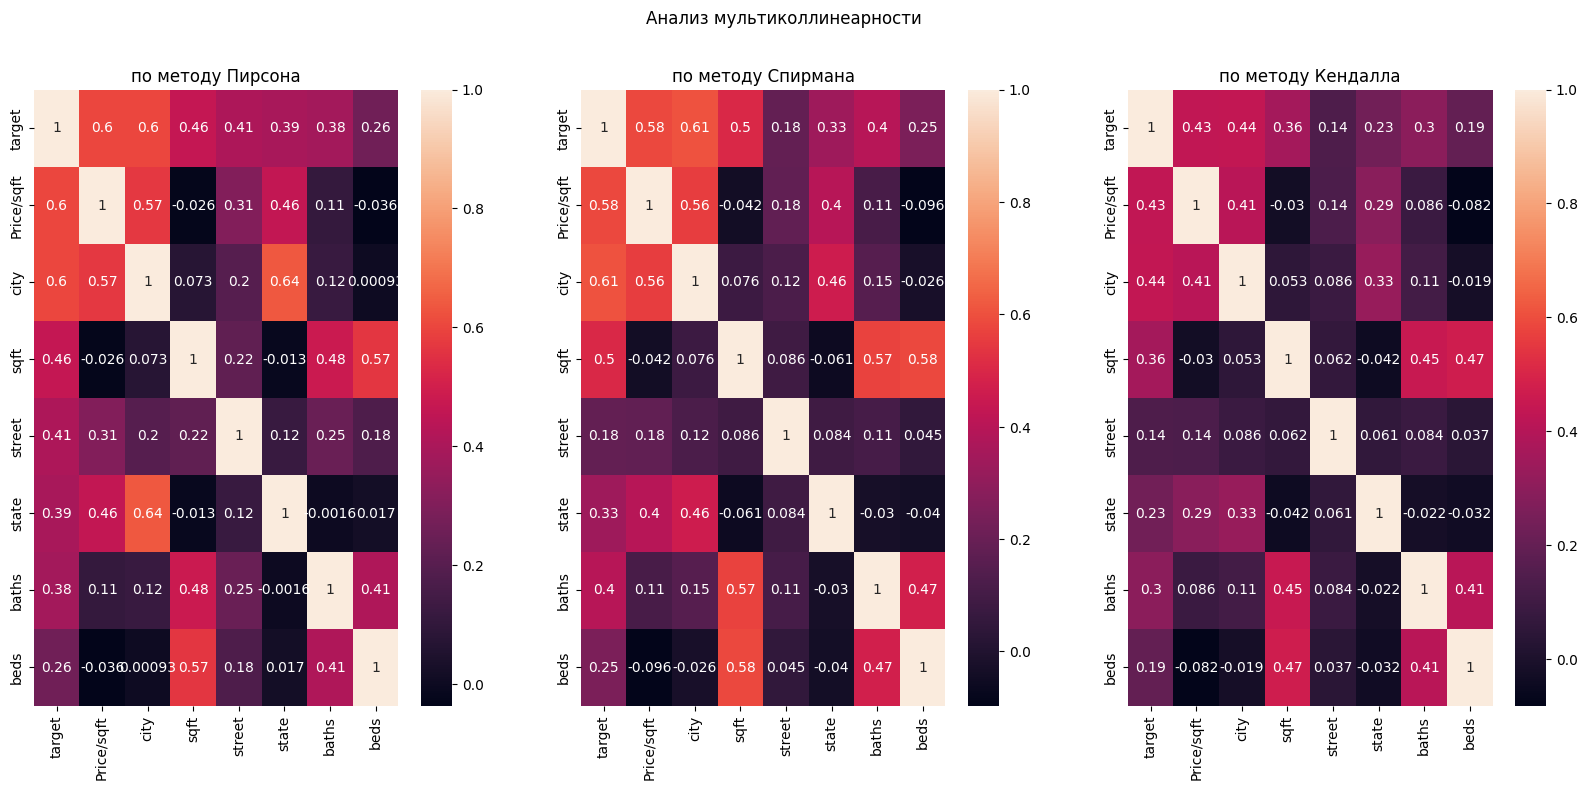

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Список признаков для анализа
selected_features = ['target', 'Price/sqft', 'city', 'sqft', 'street', 'state', 'baths', 'beds']

# Создаем подвыборку DataFrame, содержащую только выбранные признаки
data_subset = data_7[selected_features]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
fig.suptitle('Анализ мультиколлинеарности')

# Вычисляем корреляцию только для выбранных признаков
cor_1 = sns.heatmap(data_subset.corr(method='pearson'), annot=True, ax=axes[0])
cor_1.set_title('по методу Пирсона')

cor_2 = sns.heatmap(data_subset.corr(method='spearman'), annot=True, ax=axes[1])
cor_2.set_title('по методу Спирмана')

cor_3 = sns.heatmap(data_subset.corr(method='kendall'), annot=True, ax=axes[2])
cor_3.set_title('по методу Кендалла')

plt.show()


Коэффициент корреляции от 0.6 до 0.64 указывает на умеренную положительную корреляцию между анализируемыми признаками. Это означает, что существует определенная тенденция к тому, что при увеличении значения одного признака, значение другого тоже tends to увеличиваться, но эта связь не очень сильная и не всегда однозначная.

Вот несколько важных моментов, которые следует учитывать:

* Умеренная сила связи: Корреляция 0.6-0.64 не настолько высока, чтобы говорить о сильной линейной зависимости, как, например, при значениях близких к 1. Это значит, что, хотя общая тенденция прослеживается, существуют значительные отклонения от нее. Изменение одного признака не позволяет точно предсказать изменение другого.

* Положительная корреляция: Положительный знак указывает на то, что направление изменения признаков совпадает. Если один признак растет, то и другой *скорее всего* тоже растет.

* Не причинно-следственная связь: Корреляция не означает причинно-следственной связи. Даже если два признака сильно коррелируют, это не значит, что один является причиной изменения другого. Может существовать третий, скрытый фактор, влияющий на оба признака.

* Контекст: Интерпретация корреляции 0.6-0.64 зависит от контекста. В некоторых областях исследований это может считаться значимой корреляцией, в других — нет. Важно сравнивать полученное значение с типичными значениями корреляции для аналогичных данных и задач.

#3. Разделение данных

##3.1 Разделим данные на обучающую, валидационную и тестовую выборки 70/15/15

In [ ]:
data_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 55 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   street                    377185 non-null  float64
 1   baths                     377185 non-null  float64
 2   city                      377185 non-null  float64
 3   sqft                      377185 non-null  float64
 4   zipcode                   377185 non-null  int64  
 5   beds                      377185 non-null  float64
 6   state                     377185 non-null  float64
 7   target                    377185 non-null  float64
 8   Year built                377185 non-null  float64
 9   lotsize                   377185 non-null  float64
 10  Price/sqft                377185 non-null  float64
 11  status_active             377185 non-null  float64
 12  status_auction            377185 non-null  float64
 13  status_contract           377185 non-null  f

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Отделяем признаки (X) от целевой переменной (y)
X = data_7.drop('target', axis=1) # Удаляем 'target' из признаков
y = data_7['target']

# 2. Разделяем на обучающую и оставшуюся часть (валидация + тест)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7, random_state=42)

# 3. Разделяем оставшуюся часть на валидационную и тестовую
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

# Выводим размеры выборок для проверки
print(f"Обучающая выборка: {X_train.shape}, {y_train.shape}")
print(f"Валидационная выборка: {X_valid.shape}, {y_valid.shape}")
print(f"Тестовая выборка: {X_test.shape}, {y_test.shape}")


Обучающая выборка: (264029, 54), (264029,)
Валидационная выборка: (56578, 54), (56578,)
Тестовая выборка: (56578, 54), (56578,)


#III. Обучение и оценка модели

### 1. Реализация модели регрессии

<div align='justify'>Модели регрессии являются одним из основных типов задач машинного обучения. Они используются для предсказания числовых значений на основе входных данных. Например, в нашем случае, модель регрессии будет использоваться для предсказания цены дома на основе его характеристик (размер, количество спален, расположение и т.д.).</div><br>

<div align='justify'>Существует несколько видов моделей регрессии:</div>

1) Линейная регрессия: это наиболее простой и распространенный вид регрессии. Он используется для предсказания значения на основе линейной зависимости между входными данными и результатом.<br>
2) Логистическая регрессия: используется для предсказания вероятности принадлежности к определенному классу. Она обычно используется для классификации двоичных или многоклассовых данных.<br>
3) Регрессия опорных векторов (SVR): этот метод строит гиперплоскость в пространстве признаков, которая отделяет положительные примеры от отрицательных. SVR находит оптимальную гиперплоскость, минимизируя расстояние до ближайших точек (опорных векторов).<br>
4) Деревья решений: деревья решений используются для прогнозирования значений путем разделения данных на подмножества на основе входных признаков.<br>
5) Нейронные сети: нейронные сети представляют собой класс алгоритмов машинного обучения, которые имитируют работу человеческого мозга.

In [ ]:
!pip install optuna


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

from sklearn import preprocessing
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.formula.api as smf

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import optuna

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Функция для вычисления метрик задач регрессии
def regression_metrics(y_train, y_train_predict, y_test, y_test_predict):

    print('train r2_score: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('train mean_absolute_error: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('train mean_absolute_percentage_error: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100), '\n')

    print('test r2_score: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('test mean_absolute_error: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('test mean_absolute_percentage_error:  {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

###1.1. Выбор моделей регрессии

Для решения текущей задачи будем использовать следующие модели:

*   Линейная регрессия
*   Полиномиальная регрессия
*   Регрессия дерева решений
*   Регрессия случайного леса
*   Опорная векторная регрессия




In [ ]:
# Модель линейной регрессии

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)

# Вывод метрик на экран
regression_metrics(y_train, y_train_predict, y_test, y_test_predict)

train r2_score: 0.696
train mean_absolute_error: 0.090
train mean_absolute_percentage_error: 2373508190902116.500 

test r2_score: 0.698
test mean_absolute_error: 0.089
test mean_absolute_percentage_error:  2311047956738701.000


In [ ]:
# Модель полиномиальной регрессии

poly_features = PolynomialFeatures(degree=2)

X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

poly_model = linear_model.LinearRegression()
poly_model.fit(X_poly_train, y_train)

y_train_predict = poly_model.predict(X_poly_train)
y_test_predict = poly_model.predict(X_poly_test)

# Вывод метрик на экран
regression_metrics(y_train, y_train_predict, y_test, y_test_predict)